## Activation Function [ref](https://mofanpy.com/tutorials/machine-learning/torch/activation)

/home/zxt/.conda/envs/py310/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/zxt/.conda/envs/py310/lib/python3.10/site-packages/torch/nn/functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


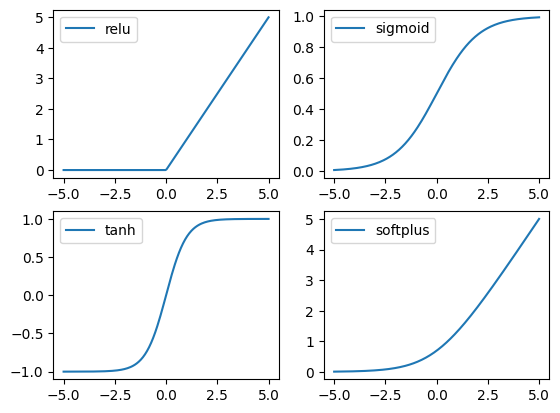

In [7]:
# Torch activation function

import torch
import torch.nn.functional as F
from torch.autograd import Variable

x = torch.linspace(-5,5,200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(x_np, y_relu, label='relu')
plt.legend()

plt.subplot(222)
plt.plot(x_np, y_sigmoid, label='sigmoid')
plt.legend()

plt.subplot(223)
plt.plot(x_np, y_tanh, label='tanh')
plt.legend()

plt.subplot(224)
plt.plot(x_np, y_softplus, label='softplus')
plt.legend()


## Regression [ref](https://mofanpy.com/tutorials/machine-learning/torch/regression)

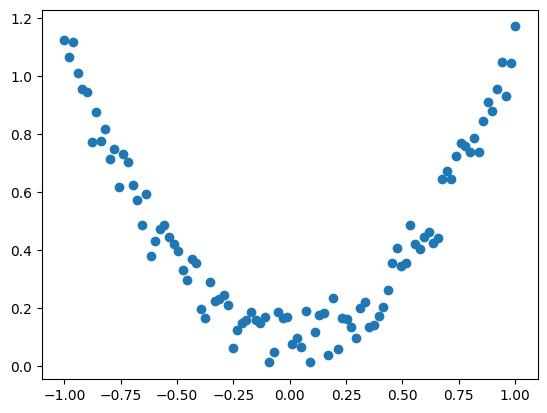

In [11]:
# Dataset

x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())


plt.scatter(x.data.numpy(), y.data.numpy())

In [12]:
# Net
import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)    

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


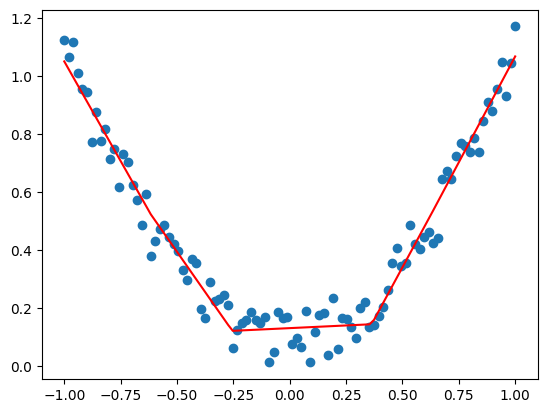

In [23]:
# Train
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.MSELoss()

for t in range(1000):
    prediction = net(x)
    loss = loss_func(prediction, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

prediction = net(x)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), color='r')    

## Classification [REF](https://mofanpy.com/tutorials/machine-learning/torch/classification)

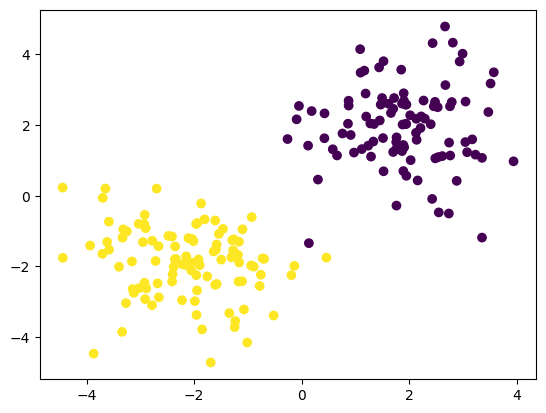

In [48]:
# Dataset

import torch
import numpy as np
import matplotlib.pyplot as plt

n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)


x = torch.cat((x0, x1), 0)
y = torch.cat((y0, y1)).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y)


In [41]:
# Net

import torch
import torch.nn.functional as F

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


/tmp/ipykernel_1935082/1815410935.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_y = torch.max(F.softmax(prediction), 1)[1]


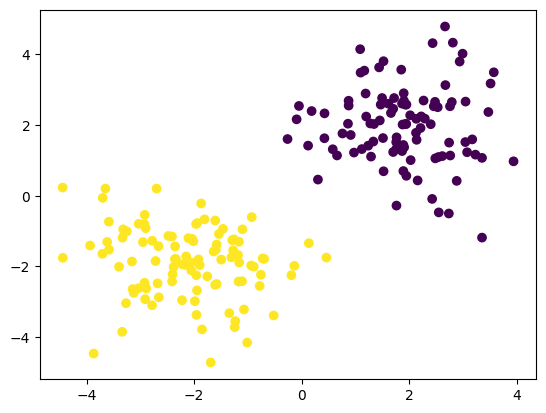

In [52]:
# Train

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
prediction = net(x)    

pred_y = torch.max(F.softmax(prediction), 1)[1]

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y)

